In [2]:
#Problem Statement:
#Given data about COVID 19 patients, write code to visualize the impact and analyze the trend
#of rate of infection and recovery as well as make predictions about the number of cases
#expected a week in future based on the current trends
#Dataset: CSV and Excel files containing data about Number of COVID 19 Confirmed, Deaths
#and Recovered patients both around the World and in India. Download Link
#Guidelines:
#• Use pandas to accumulate data from multiple data files
#• Use plotly (visualization library) to create interactive visualizations
#• Use Facebook prophet library to make time series models
#• Visualize the prediction by combining these technologies

In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [5]:
df=pd.read_csv("covid_19_clean_complete.csv",parse_dates=['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [6]:
df.rename(columns={'Date':'date',
                  'Province/State':'state',
                  'Country/Region':'country',
                  'Lat':'lat','Long':'long',
                  'Confirmed':'confirmed',
                  'Deaths':'deaths',
                  'Recovered':'recovered'},inplace=True)

In [7]:
df['active']=df['confirmed']-df['deaths']-df['recovered']

In [8]:
df.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0,2.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0,2.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0,0.0


In [9]:
top=df[df['date']==df['date'].max()]
world=top.groupby('country')['confirmed','active','deaths'].sum().reset_index()
world.head()

<ipython-input-9-a9c4d60d7531>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  world=top.groupby('country')['confirmed','active','deaths'].sum().reset_index()


,country,confirmed,active,deaths
0,Afghanistan,40.0,38.0,1.0
1,Albania,89.0,85.0,2.0
2,Algeria,201.0,119.0,17.0
3,Andorra,113.0,111.0,1.0
4,Angola,2.0,2.0,0.0


In [10]:
world=top.groupby('country')['confirmed','active','deaths'].sum().reset_index()
world.head()

<ipython-input-10-342f97fe8b1c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  world=top.groupby('country')['confirmed','active','deaths'].sum().reset_index()


,country,confirmed,active,deaths
0,Afghanistan,40.0,38.0,1.0
1,Albania,89.0,85.0,2.0
2,Algeria,201.0,119.0,17.0
3,Andorra,113.0,111.0,1.0
4,Angola,2.0,2.0,0.0


In [11]:
df.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0,2.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0,2.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0,0.0


<ipython-input-12-2232016c6f7c>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_cases=df.groupby('date')['date','confirmed'].sum().reset_index()


[Text(0.5, 0, 'dates'), Text(0, 0.5, 'total cases')]

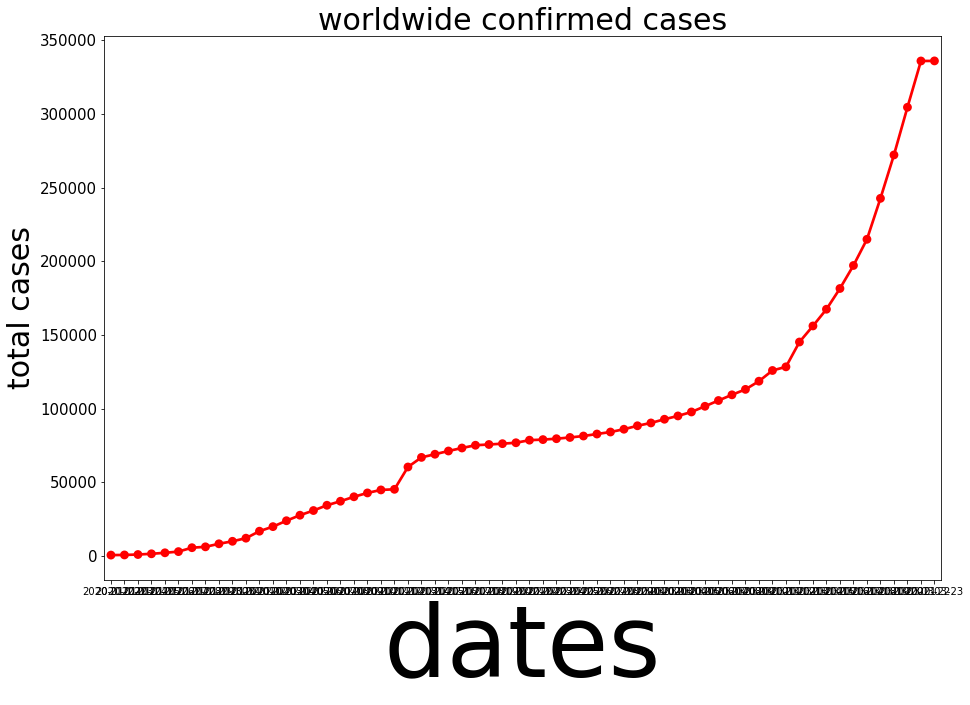

In [12]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=100)
plt.ylabel('total no of cases',fontsize=30)
plt.title('worldwide confirmed cases',fontsize=30)
total_cases=df.groupby('date')['date','confirmed'].sum().reset_index()
total_cases['date']=pd.to_datetime(total_cases['date'])

ax=sns.pointplot(x=total_cases.date.dt.date,y=total_cases.confirmed,color='r')
ax.set(xlabel='dates',ylabel='total cases')

In [13]:
total_cases=df.groupby('date')['date','confirmed'].sum().reset_index()

<ipython-input-13-3650646c7fae>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_cases=df.groupby('date')['date','confirmed'].sum().reset_index()


In [14]:
top_active=top.groupby(by='country')['active'].sum().sort_values(ascending=False).head(20).reset_index()
top_active

,country,active
0,Italy,46638.0
1,US,32681.0
2,Germany,24513.0
3,Spain,24421.0
4,France,13170.0
5,Iran,12022.0
6,Switzerland,7016.0
7,South Korea,5884.0
8,United Kingdom,5392.0
9,China,5351.0


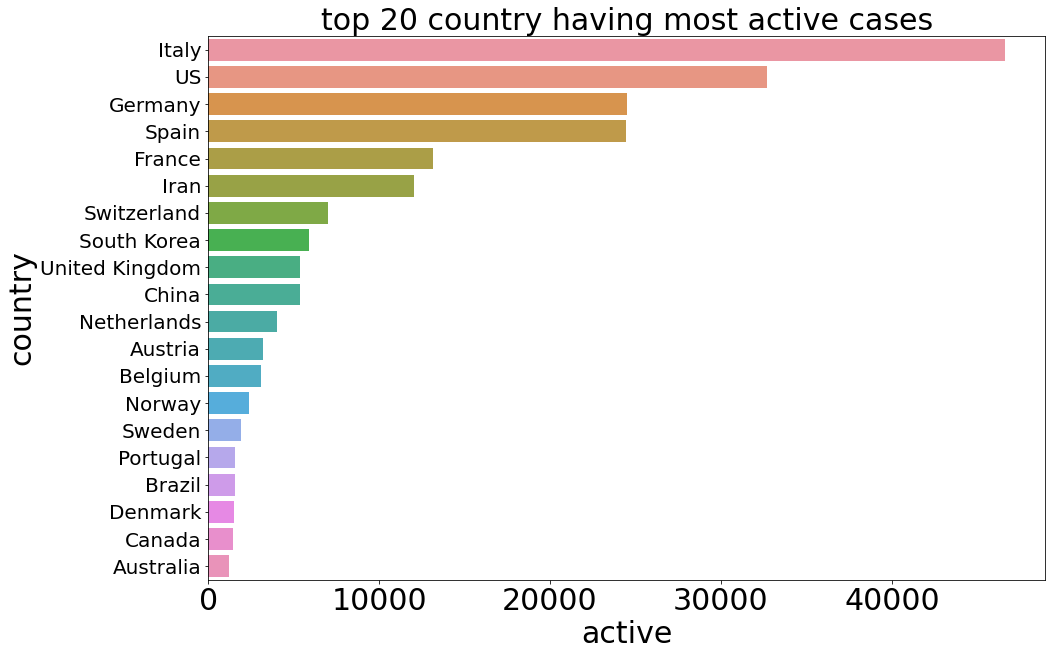

In [15]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=30)
plt.yticks(fontsize=20)
plt.xlabel('total cases',fontsize=30)
plt.ylabel('country',fontsize=30)
plt.title("top 20 country having most active cases",fontsize=30)
ax = sns.barplot(x=top_active.active,y=top_active.country)

In [16]:

top_death=top.groupby(by='country')['deaths'].sum().sort_values(ascending=False).head(20).reset_index()
top_death

,country,deaths
0,Italy,5476.0
1,China,3274.0
2,Spain,1772.0
3,Iran,1685.0
4,France,674.0
5,US,417.0
6,United Kingdom,282.0
7,Netherlands,180.0
8,South Korea,104.0
9,Switzerland,98.0


In [17]:
top_death=df.groupby(by='country')['deaths'].sum().sort_values(ascending=False).head(20).reset_index()
top_death

,country,deaths
0,China,119412.0
1,Italy,39435.0
2,Iran,14809.0
3,Spain,9117.0
4,France,3533.0
5,US,2164.0
6,South Korea,1543.0
7,United Kingdom,1382.0
8,Netherlands,870.0
9,Switzerland,491.0


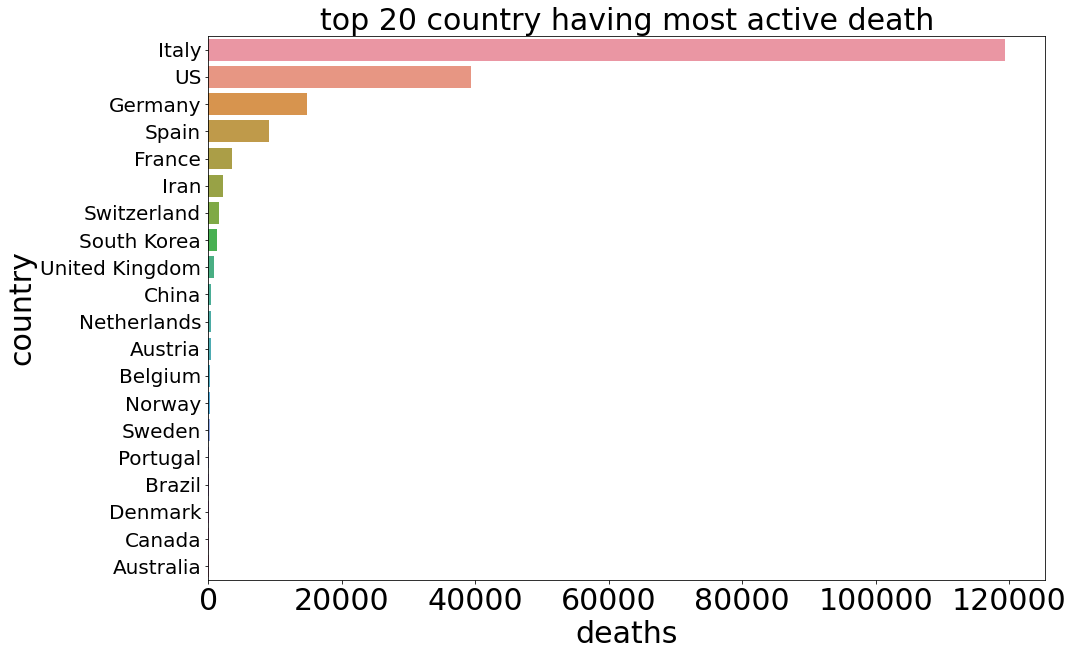

In [18]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=30)
plt.yticks(fontsize=20)
plt.xlabel('total deaths',fontsize=30)
plt.ylabel('country',fontsize=30)
plt.title("top 20 country having most active death",fontsize=30)
ax = sns.barplot(x=top_death.deaths,y=top_active.country)

In [19]:

top_recovery=top.groupby(by='country')['recovered'].sum().sort_values(ascending=False).head(20).reset_index()
top_recovery

,country,recovered
0,China,72814.0
1,Iran,7931.0
2,Italy,7024.0
3,South Korea,2909.0
4,Spain,2575.0
5,France,2200.0
6,Cruise Ship,325.0
7,Germany,266.0
8,Belgium,263.0
9,Japan,235.0


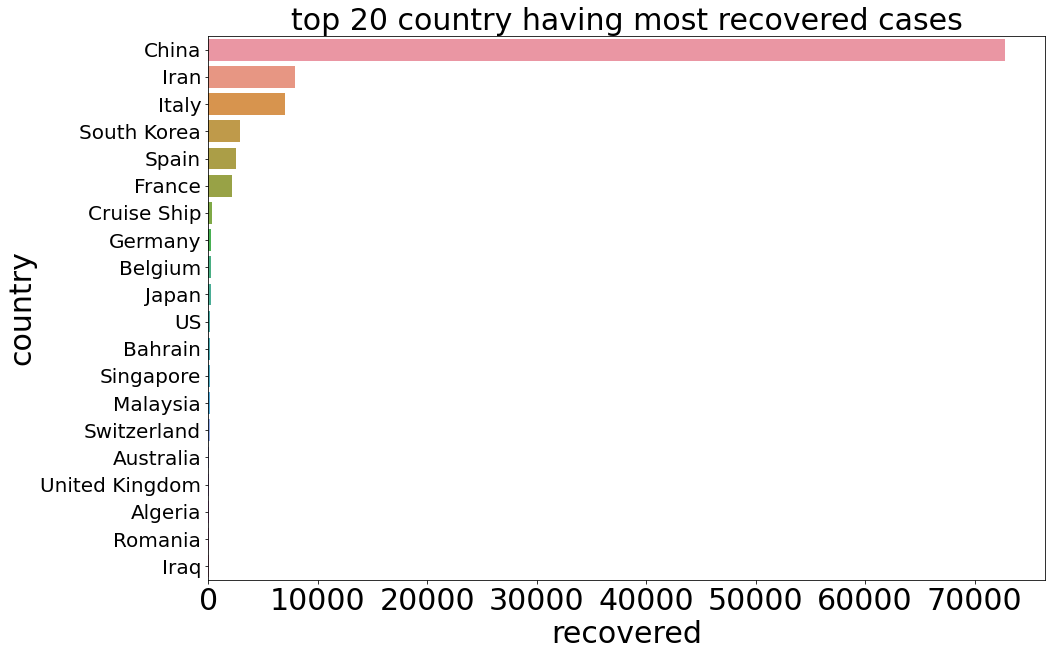

In [20]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=30)
plt.yticks(fontsize=20)
plt.xlabel('total recovered',fontsize=30)
plt.ylabel('country',fontsize=30)
plt.title("top 20 country having most recovered cases",fontsize=30)
ax = sns.barplot(x=top_recovery.recovered,y=top_recovery.country)

In [21]:
china=df[df.country=='China']
china=china.groupby('date')['recovered','active','confirmed','deaths'].sum().reset_index()


<ipython-input-21-7a100dd3ae87>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  china=china.groupby('date')['recovered','active','confirmed','deaths'].sum().reset_index()


In [22]:
us=df[df.country=='US']
us=us.groupby('date')['recovered','active','confirmed','deaths'].sum().reset_index()

<ipython-input-22-b6b8c7df2cb7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  us=us.groupby('date')['recovered','active','confirmed','deaths'].sum().reset_index()


In [23]:
italy=df[df.country=='Italy']
italy=italy.groupby('date')['recovered','active','confirmed','deaths'].sum().reset_index()

<ipython-input-23-e5eec9309046>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  italy=italy.groupby('date')['recovered','active','confirmed','deaths'].sum().reset_index()


In [24]:
india=df[df.country=='India']
india=india.groupby('date')['recovered','active','confirmed','deaths'].sum().reset_index()

<ipython-input-24-cdb6db35af93>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  india=india.groupby('date')['recovered','active','confirmed','deaths'].sum().reset_index()


C:\Users\india\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\india\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\india\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\india\anacond

Text(0.5, 0, 'no of days')

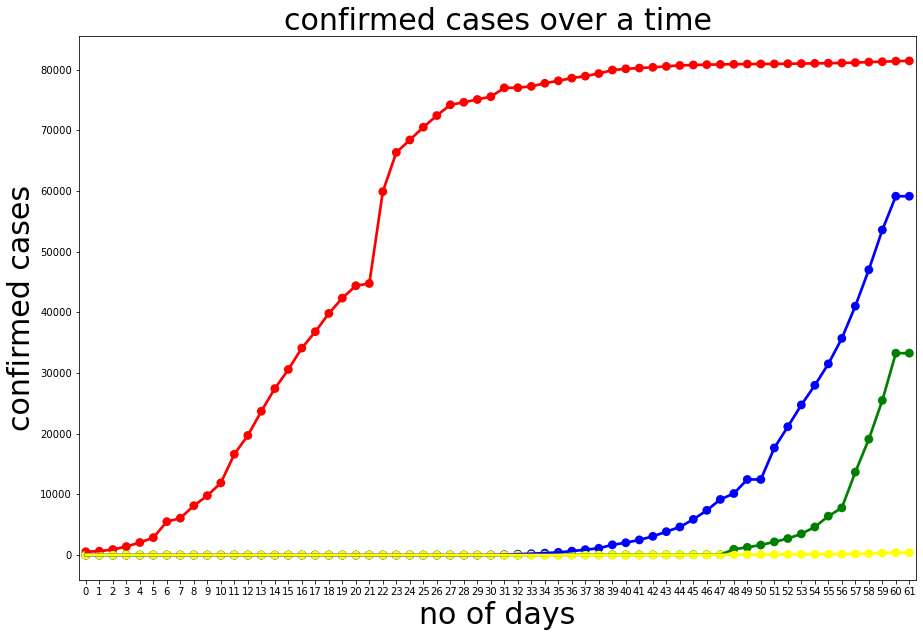

In [25]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.confirmed,color="red")
sns.pointplot(us.index,us.confirmed,color="green")
sns.pointplot(italy.index,italy.confirmed,color="blue")
sns.pointplot(india.index,india.confirmed,color="yellow")

plt.title('confirmed cases over a time',fontsize=30)
plt.ylabel('confirmed cases',fontsize=30)
plt.xlabel('no of days',fontsize=30)

# END OF ASSIGNMENT 